# **Trabalho de Linguagem de Programação Aplicada - Análise de Preços de Carros no Brasil**

Este notebook contém a análise exploratória, visualização de dados e aplicação de modelos de machine learning na base `precos_carros_brasil.csv`, referente aos preços médios de carros no Brasil no ano de 2021.

---
## **1. Análise Exploratória dos Dados**
Nesta seção, realizaremos a análise inicial da base para entender sua estrutura e qualidade.

### **1.1 Carregamento dos Dados**
Carregamos a base `precos_carros_brasil.csv` e visualizamos suas primeiras linhas.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('precos_carros_brasil.csv')
data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### **1.2 Tratamento de Valores Faltantes**
Verificamos se há valores ausentes e aplicamos uma estratégia para tratá-los.

In [4]:
data.isna().any()

,0
year_of_reference,True
month_of_reference,True
fipe_code,True
authentication,True
brand,True
model,True
fuel,True
gear,True
engine_size,True
year_model,True


In [5]:
data.isna().sum()

,0
year_of_reference,65245
month_of_reference,65245
fipe_code,65245
authentication,65245
brand,65245
model,65245
fuel,65245
gear,65245
engine_size,65245
year_model,65245


In [6]:
data.dropna(inplace=True)

### **1.3 Identificação de Dados Duplicados**
Detectamos e removemos, se necessário, registros duplicados.

In [7]:
data.duplicated().sum()

2

In [10]:
data[data.duplicated()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl


In [9]:
data.drop_duplicates(inplace=True)

### **1.4 Classificação de Variáveis**
Separamos as colunas entre numéricas e categóricas e geramos estatísticas descritivas.

In [11]:
numericas = data.select_dtypes(include=['float64', 'int64'])
categoricas = data.select_dtypes(include=['object'])

In [12]:
numericas.describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [13]:
categoricas.describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


### **1.5 Distribuição das Variáveis Categóricas**
Contamos quantas ocorrências há para cada modelo e marca de carro.

In [14]:
data['model'].value_counts()

,count
model,
Palio Week. Adv/Adv TRYON 1.8 mpi Flex,425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p,425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.,400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V,400
"Corvette 5.7/ 6.0, 6.2 Targa/Stingray",375
...,...
STEPWAY Zen Flex 1.0 12V Mec.,2
Saveiro Robust 1.6 Total Flex 16V CD,2
Saveiro Robust 1.6 Total Flex 16V,2


In [15]:
data['brand'].value_counts()

,count
brand,
Fiat,44962
VW - VolksWagen,44312
GM - Chevrolet,38590
Ford,33150
Renault,29191
Nissan,12090


### **1.6 Resumo dos Resultados**
Breve explicação sobre os principais insights da análise exploratória.

---
## **2. Visualização dos Dados**

### **2.1 Distribuição da Quantidade de Carros por Marca**
Geramos um gráfico para visualizar a quantidade de registros por marca.

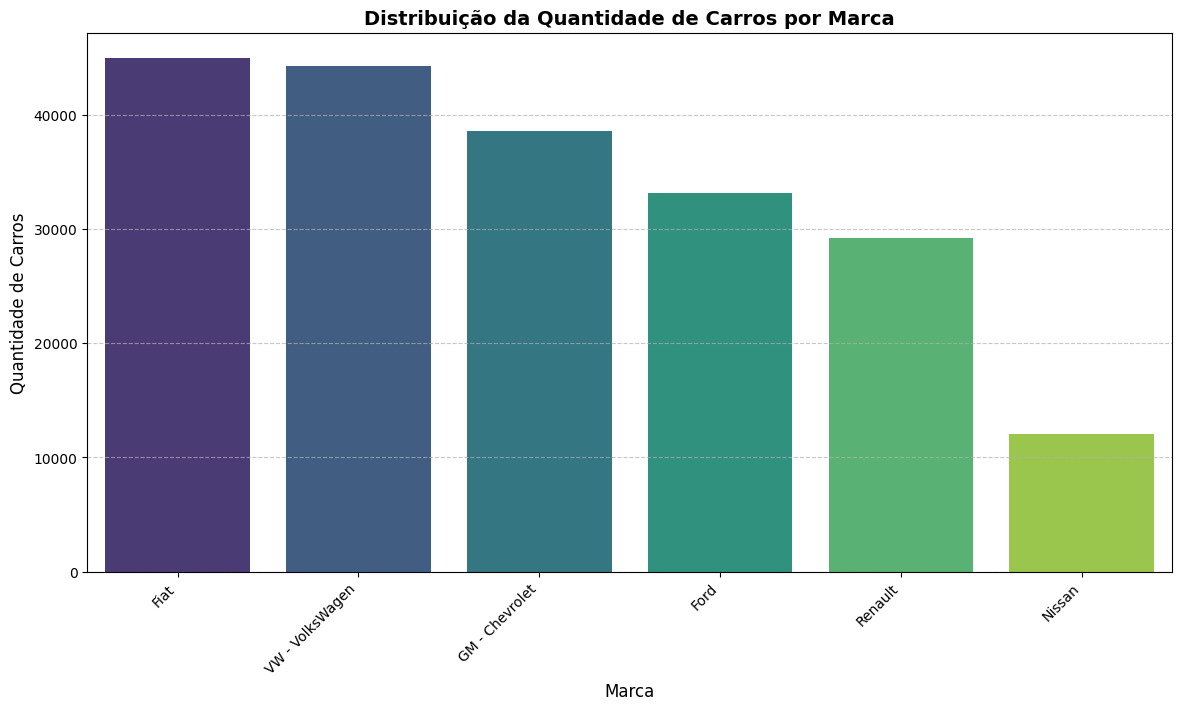

In [16]:
brand_counts = data['brand'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title('Distribuição da Quantidade de Carros por Marca', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Quantidade de Carros', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### **2.2 Distribuição da Quantidade de Carros por Tipo de Engrenagem**
Visualizamos a distribuição dos diferentes tipos de engrenagem (`gear`).

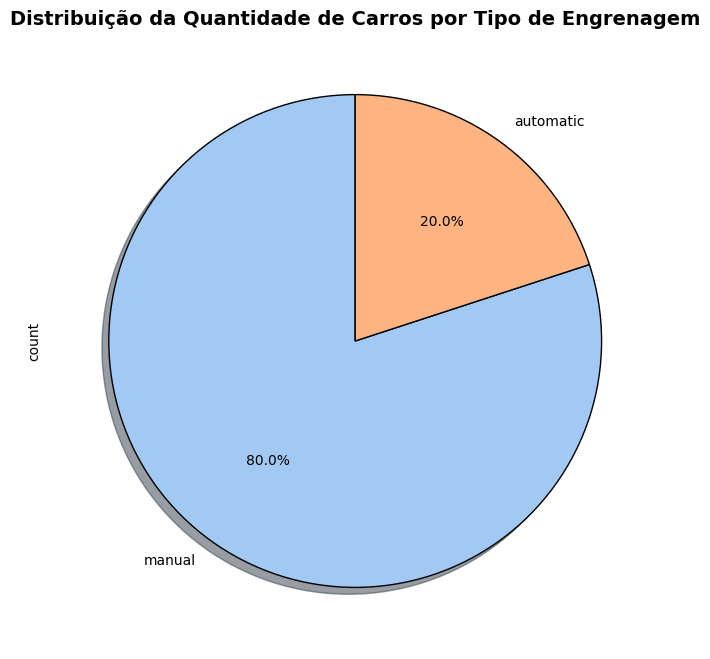

In [17]:
gear_counts = data['gear'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")

gear_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Distribuição da Quantidade de Carros por Tipo de Engrenagem', fontsize=14, fontweight='bold')

plt.show()

### **2.3 Evolução da Média de Preços ao Longo dos Meses de 2022**
Geramos um gráfico para observar a variação dos preços ao longo do tempo.

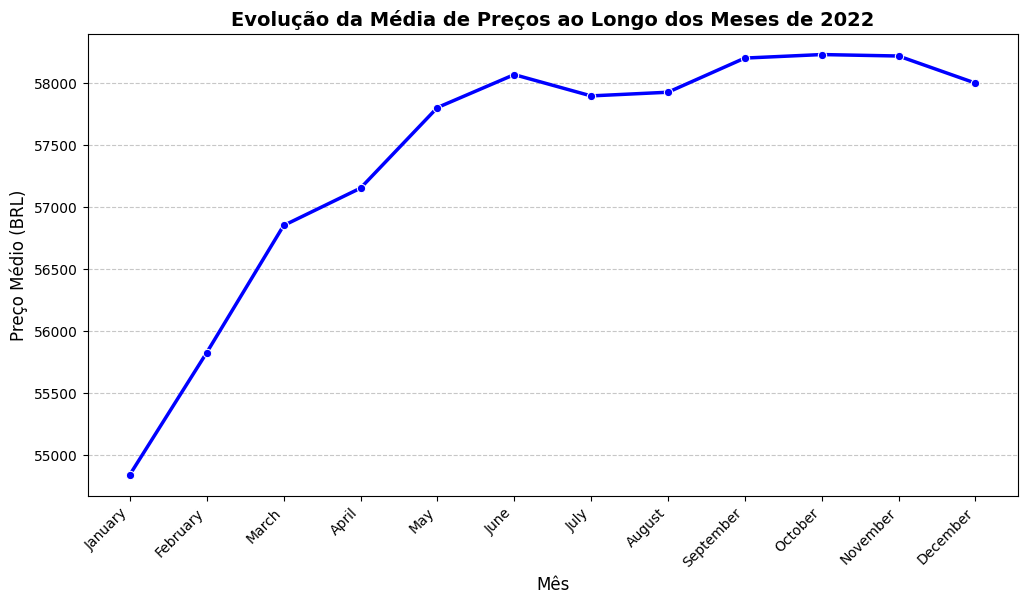

In [18]:
plt.figure(figsize=(12, 6))

data_2022 = data[data['year_of_reference'] == 2022].copy()

sns.lineplot(data=data_2022, x='month_of_reference', y='avg_price_brl',  ci=None, marker='o', linewidth=2.5, color='b')
plt.title('Evolução da Média de Preços ao Longo dos Meses de 2022', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Preço Médio (BRL)', fontsize=12)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### **2.4 Distribuição da Média de Preços por Marca e Tipo de Engrenagem**
Criamos um gráfico para analisar essa relação e escrevemos uma breve explicação sobre os padrões observados.

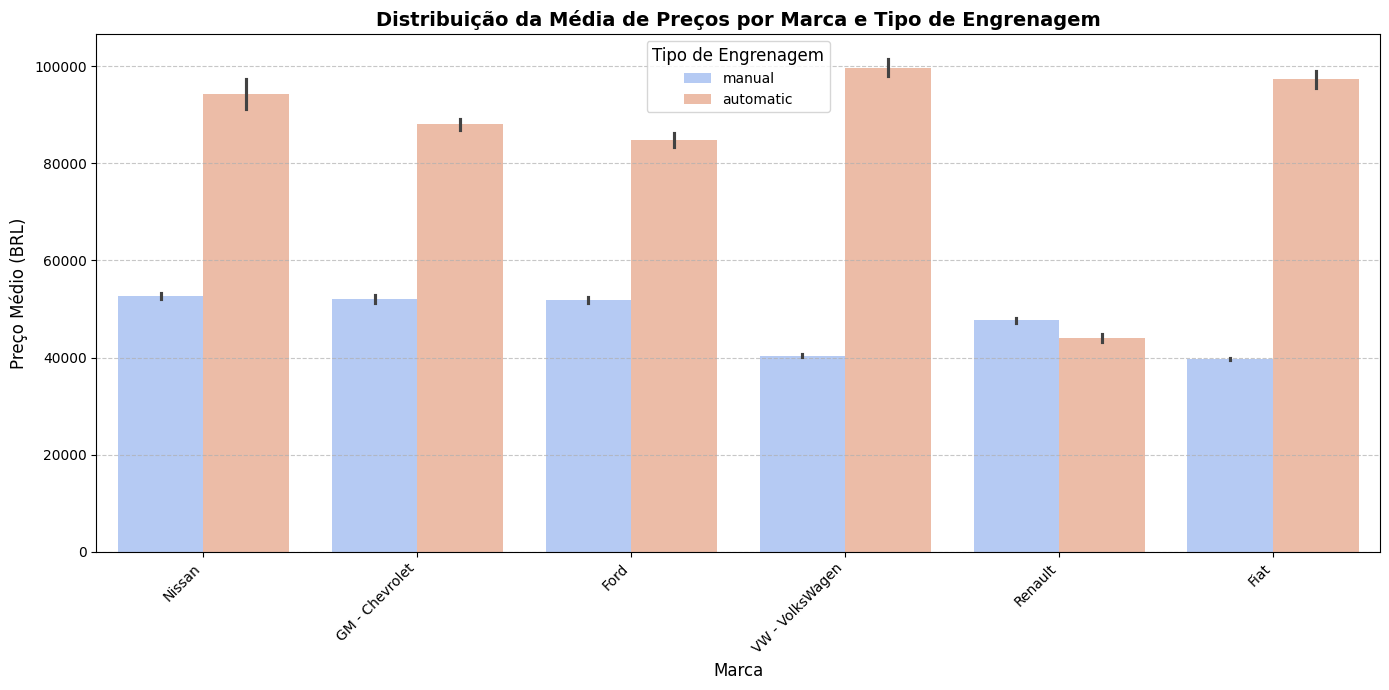

In [19]:
brand_order = data.groupby('brand')['avg_price_brl'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='brand', y='avg_price_brl', hue='gear', order=brand_order, palette='coolwarm')

plt.title('Distribuição da Média de Preços por Marca e Tipo de Engrenagem', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio (BRL)', fontsize=12)


plt.legend(title='Tipo de Engrenagem', title_fontsize=12, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### **2.5 Distribuição da Média de Preços por Marca e Tipo de Combustível**
Criamos um gráfico para visualizar essa relação e escrevemos uma breve explicação sobre os padrões observados.

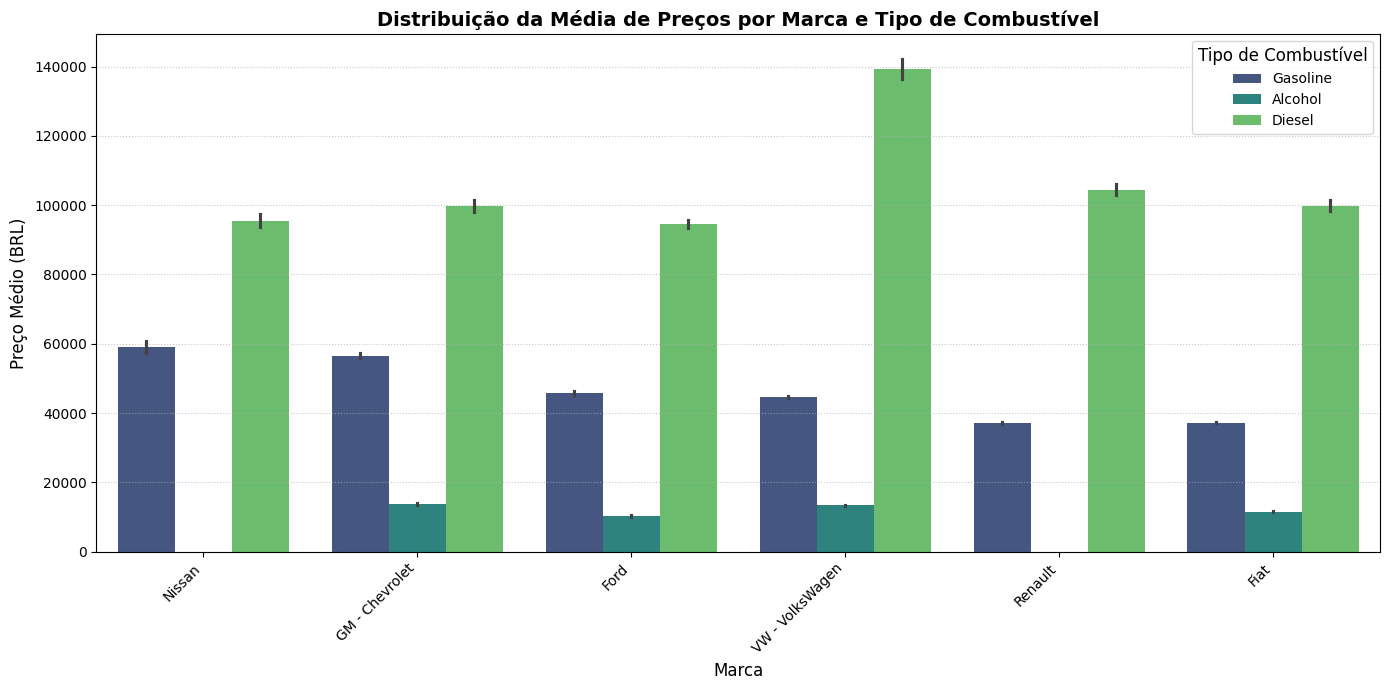

In [20]:
brand_order = data.groupby('brand')['avg_price_brl'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='brand', y='avg_price_brl', hue='fuel', order=brand_order, palette='viridis')

plt.title('Distribuição da Média de Preços por Marca e Tipo de Combustível', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Preço Médio (BRL)', fontsize=12)

plt.legend(title='Tipo de Combustível', title_fontsize=12, fontsize=10)

plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()

plt.show()


## **3. Aplicação de Modelos de Machine Learning**

### **3.1 Seleção das Variáveis para Modelagem**
Escolhemos as variáveis numéricas e transformamos variáveis categóricas para usá-las no modelo.

In [ ]:
# Código para seleção e transformação de variáveis

### **3.2 Divisão dos Dados em Treino e Teste**
Separamos 75% dos dados para treino e 25% para teste.

In [ ]:
# Código para divisão dos dados

### **3.3 Treinamento dos Modelos**
Treinamos dois modelos de regressão para prever o preço médio dos carros:
- `RandomForestRegressor`
- `XGBRegressor`

In [ ]:
# Código para treinamento do Random Forest

In [ ]:
# Código para treinamento do XGBoost

### **3.4 Armazenamento das Predições**
Salvamos os valores previstos pelos modelos.

In [ ]:
# Código para armazenar as previsões

### **3.5 Importância das Variáveis**
Analisamos as variáveis mais relevantes para a predição do preço dos carros.

In [ ]:
# Código para análise da importância das variáveis

### **3.6 Escolha do Melhor Modelo**
Comparamos os modelos usando as métricas MSE, MAE e R².

In [ ]:
# Código para calcular e comparar métricas dos modelos

### **3.7 Resumo dos Resultados**
Breve explicação sobre qual modelo teve o melhor desempenho.

In [ ]:
# Código para exibir um resumo final dos resultados